# 말뭉치 전처리

In [406]:
# 한 대본을 scene별로 구분함
def divide_scene(title, data):
    
    scenes = []
    scene = ''
    spks = []
    prev_no = 0
    
    for dcn in data['utterance']:
        
        
        scene_no = int(dcn['id'].split('.')[-2])
        spk = dcn['speaker_id'] #화자
        
        # 대화가 없으면 생략
        if spk != '' and spk not in spks:
            spks.append(spk)
        else:
            continue
        
        note = dcn['note'] #상황
        utter = dcn['original_form'] #대화
                
        if spk != '':
            spk += ':'

        if note != '':
            note += '\n'

        total = spk.split('\n')[0] + utter
        
        
        total = '\n>>' + total.replace('\n', '')
        
        scene += total
        
        #scene 초기화
        if prev_no != scene_no:
            scene = 'title: ' + title + '#' + str(scene_no) +'\nspeakers: ' + ', '.join(spks) + scene
            scenes.append(scene)
            scene = ''
            spks = []
        
        prev_no = scene_no
        
    return scenes

In [407]:
import os

path = 'NIKL_SPOKEN_v1.1/국립국어원 구어 말뭉치(버전 1.1)/'
files = os.listdir(path)
len(files)

25697

In [408]:
import json
from tqdm.notebook import tqdm

# 대본만사용
files = [file for file in files if file[1] == "E"]
scripts = []
titles = []

for file in tqdm(files, total = len(files)):
    with open(path + file, encoding='utf-8') as f:
        script = json.load(f)
        doc = script['document'][0]
        title = doc['metadata']['title'] #제목
        titles.append(title)
        scenes = divide_scene(title, doc)
        scripts += scenes


  0%|          | 0/4102 [00:00<?, ?it/s]

# W대본 전처리

In [409]:
def divide_Wscene(title, script):
    
    scenes = script.split('씬/')[1:]

    ret = []
    for scene in scenes:

        scene = scene.replace('\n\t\n\t','\n').replace('\n\t','').replace('\n\n','\n')
        scene_no = scene.split('\t')[0]
        scene = '\t'.join(scene.split('\t')[1:]).replace('\t',':').replace('\n', '\n>>')


        
        #대화만 추출
        utters = [scene for scene in scene.split('\n>>') if ':' in scene]
        
        #화자 추가
        spks = []
        for utter in utters:
            spk = utter.split(':')[0]
            if spk not in spks:
                spks.append(spk)
                        
        scene = '\n>>'.join(utters)
        
        scene = 'title: ' + title + ' #'+ scene_no +'\nspeakers: ' + ', '.join(spks) + '\n>>' + scene
        
        ret.append(scene)
    
    return ret

In [410]:
import os 

W_path = 'W대본_txt/'
files = os.listdir(W_path)

# scripts = []
for file in tqdm(files, total=len(files)):
    with open(W_path + file) as f:
        
        script = f.read()
        
        title = file.split('대본')[0][:-1]
        
        scenes = divide_Wscene(title, script)
        
        scripts += scenes


  0%|          | 0/17 [00:00<?, ?it/s]

In [411]:
len(scripts)

124223

In [412]:
print(scripts[-147])

title: W 7회 #48
speakers: 아나운서, 강철
>>아나운서:(E) 어제 오후 서울 구치소를 탈출해 소동을 빚었던 용의자 오씨가 조금 전 체포되었다는 소식이 전해졌습니다. 오씨는 이미 시내로 도주한 것으로 예상되었으나 구치소 내에 숨어 있다 검거된 것으로 알려졌습니다. 경찰은 긴급체포 후 현재 중부경찰서로 이송 중이며, 밤샘 조사를 할 것으로...
>>강철:(그 말에 바로 경찰서 쪽으로 방향을 요란하게 꺾는다)


# sampling

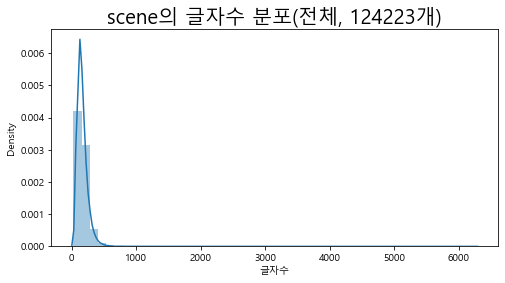

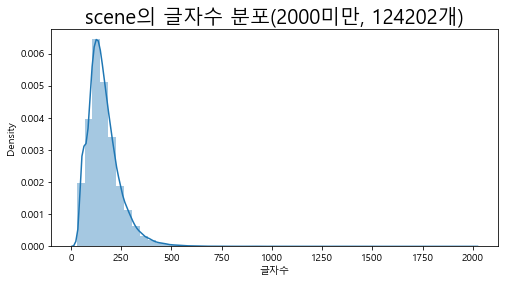

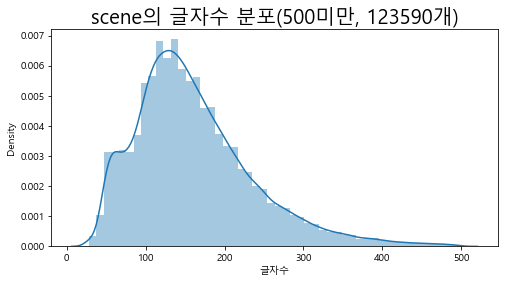

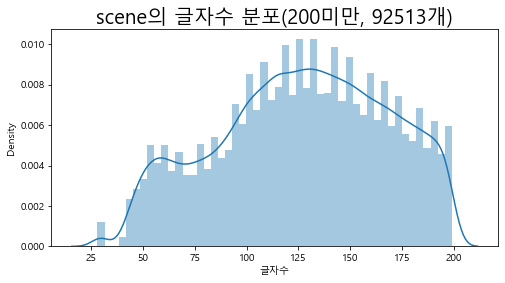

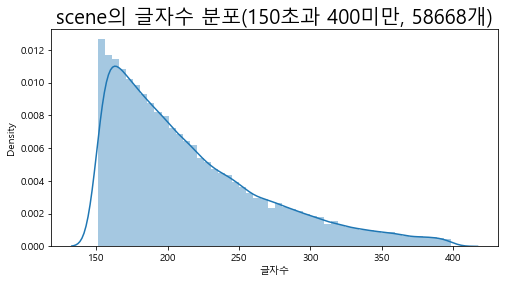

In [447]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.rc('font', family='Malgun Gothic') # For Windows
# print(plt.rcParams['font.family'])
warnings.filterwarnings("ignore")

script_length = [len(script) for script in scripts]
script_length = pd.Series(script_length)

plt.figure(figsize=(8, 4))
sns.distplot(script_length)
length = len(script_length)
plt.title(f'scene의 글자수 분포(전체, {length}개)', size=20)
plt.xlabel('글자수')
plt.show()

plt.figure(figsize=(8, 4))
sns.distplot(script_length[script_length<2000])
length = len(script_length[script_length<2000])
plt.title(f'scene의 글자수 분포(2000미만, {length}개)', size=20)
plt.xlabel('글자수')

plt.show()

plt.figure(figsize=(8, 4))
sns.distplot(script_length[script_length<500])
length = len(script_length[script_length<500])
plt.title(f'scene의 글자수 분포(500미만, {length}개)', size=20)
plt.xlabel('글자수')
plt.show()

plt.figure(figsize=(8, 4))
sns.distplot(script_length[script_length<200])
length = len(script_length[script_length<200])
plt.title(f'scene의 글자수 분포(200미만, {length}개)', size=20)
plt.xlabel('글자수')
plt.show()


plt.figure(figsize=(8, 4))
sns.distplot(script_length[(script_length>150) * (script_length<400)])
length = len(script_length[(script_length>150) * (script_length<400)])
plt.title(f'scene의 글자수 분포(150초과 400미만, {length}개)', size=20)
plt.xlabel('글자수')
plt.show()

In [448]:
# 150~400 글자수의 scene만 추출

length_150_400 = script_length[(script_length>150) * (script_length<400)].index
scripts_150_400= []

for idx in length_150_400:
    
    scripts_150_400.append(scripts[idx])

In [450]:
len(scripts_150_400)

58668

In [451]:
import joblib
joblib.dump(scripts_150_400, 'scripts_150_400')

['scripts_150_400']